In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
model = ChatOpenAI(
    model="gpt-3.5-turbo"
)

In [4]:
class BlogState(TypedDict):

    topic: str
    outline: str
    content: str

In [12]:
def create_outline(blog_state: BlogState):

    topic = blog_state["topic"]

    prompt = f"Generate a Detailed outline for blog on the topic - {topic}"

    result = model.invoke(prompt)

    outline = result.content

    blog_state["outline"] = outline

    return blog_state

In [13]:
def create_blog(blog_state: BlogState):

    topic = blog_state['topic']
    outline = blog_state['outline']

    prompt = f"Write a detailed blog on the title - {topic} using the follwing outline \n {outline}"

    result = model.invoke(prompt)

    blog_content = result.content

    blog_state['content'] = blog_content

    return blog_state

In [14]:
graph = StateGraph(BlogState)

graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", END)

workflow = graph.compile()

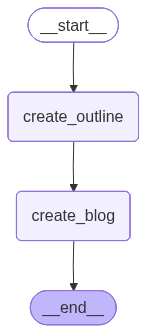

In [15]:
workflow

In [16]:
intial_state = {"topic": "Rise of AI in India"}

final_state = workflow.invoke(intial_state)

In [17]:
print(final_state)

{'topic': 'Rise of AI in India', 'outline': 'I. Introduction\n   A. Definition of AI\n   B. Overview of AI technology\n   C. Importance of AI in India\nII. Historical perspective of AI in India\n   A. Emergence of AI in India\n   B. Evolution of AI technology in India\nIII. Current status of AI in India\n   A. Growth of AI startups in India\n   B. Adoption of AI by Indian businesses\n   C. Government initiatives to promote AI in India\nIV. Impact of AI in India\n   A. Economic impact of AI in India\n   B. Social impact of AI in India\n   C. Ethical implications of AI in India\nV. Challenges and opportunities of AI in India\n   A. Challenges faced by AI technology in India\n   B. Opportunities for growth and development of AI in India\nVI. Future outlook of AI in India\n   A. Potential applications of AI in various sectors in India\n   B. Predictions for the future of AI technology in India\nVII. Conclusion\n   A. Recap of key points discussed\n   B. Final thoughts on the rise of AI in 

In [18]:
print(final_state["outline"])

I. Introduction
   A. Definition of AI
   B. Overview of AI technology
   C. Importance of AI in India
II. Historical perspective of AI in India
   A. Emergence of AI in India
   B. Evolution of AI technology in India
III. Current status of AI in India
   A. Growth of AI startups in India
   B. Adoption of AI by Indian businesses
   C. Government initiatives to promote AI in India
IV. Impact of AI in India
   A. Economic impact of AI in India
   B. Social impact of AI in India
   C. Ethical implications of AI in India
V. Challenges and opportunities of AI in India
   A. Challenges faced by AI technology in India
   B. Opportunities for growth and development of AI in India
VI. Future outlook of AI in India
   A. Potential applications of AI in various sectors in India
   B. Predictions for the future of AI technology in India
VII. Conclusion
   A. Recap of key points discussed
   B. Final thoughts on the rise of AI in India


In [19]:
print(final_state["content"])



I. Introduction

With the rapid advancement of technology, Artificial Intelligence (AI) has become an integral part of various industries around the world. AI refers to the simulation of human intelligence processes by machines, including learning, reasoning, and self-correction. This technology has the potential to revolutionize the way we live and work by automating tasks, increasing efficiency, and driving innovation.

II. Historical perspective of AI in India

AI in India dates back to the 1960s when the country's premier educational institutions started research in this field. Over the decades, AI technology has evolved with the establishment of dedicated research centers, collaborations with international universities, and the emergence of AI startups in India.

III. Current status of AI in India

The past few years have seen a significant rise in the number of AI startups in India, catering to various industries such as healthcare, finance, retail, and agriculture. Indian busi